# Plan
- dict of boolean array of core genome
- for each sample determine % core callable
- plot histogram of this
- dict of number of samples callable at each position
- for each well-covered samples, add to number of callable samples
- plot this genome-wide

In [1]:
%run _standard_imports.ipynb
%run _shared_setup.ipynb
%run _plotting_setup.ipynb

python 3.4.3 |Anaconda 2.2.0 (64-bit)| (default, Mar  6 2015, 12:03:53) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
numpy 1.9.2
scipy 0.15.1
pandas 0.15.2
numexpr 2.3.1
pysam 0.8.3
pysamstats 0.23
petl 1.0.11
petlx 1.0.3
vcf 0.6.7
vcfnp 2.3.0.dev0
h5py 2.4.0
tables 3.1.1


In [2]:
# see 20160525_CallableLoci_bed_release_5.ipynb
lustre_dir = "/lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5"
callable_loci_bed_fn_format = "%s/results/callable_loci_%%s.bed" % lustre_dir

plot_dir = "/nfs/team112_internal/rp7/data/pf3k/analysis/20160718_pilot_manuscript_accessibility"
!mkdir -p {plot_dir}

core_regions_fn = "%s/core_regions_20130225.bed" % lustre_dir

callable_loci_fn = "%s/callable_loci_high_coverage_samples.bed" % plot_dir
callable_loci_merged_fn = "%s/callable_loci_merged_samples.bed" % plot_dir

multiIntersectBed = '/nfs/team112_internal/rp7/opt/bedtools/bedtools2/bin/multiIntersectBed'
bedtools = '/nfs/team112_internal/rp7/opt/bedtools/bedtools2/bin/bedtools'

# core_regions_fn = '/nfs/team112_internal/rp7/src/github/malariagen/pf-crosses/meta/regions-20130225.bed.gz'

In [25]:
core_genome_dict = collections.OrderedDict()
for chrom in ['Pf3D7_%02d_v3' % i for i in range(1, 15)]:
    this_chrom_regions = (etl
                          .fromtabix(REGIONS_FN, chrom)
                          .pushheader('chrom', 'start', 'end', 'region')
                          .convertnumbers()
                          )
    chrom_length = np.max(this_chrom_regions.convert('end', int).values('end').array())
    core_genome_dict[chrom] = np.zeros(chrom_length, dtype=bool)
    for rec in this_chrom_regions:
        if rec[3] == 'Core':
            core_genome_dict[chrom][rec[1]:rec[2]] = True

In [3]:
tbl_sample_metadata = etl.fromtsv(SAMPLE_METADATA_FN)

In [4]:
tbl_field_samples = tbl_sample_metadata.select(lambda rec: not rec['study'] in ['1041', '1042', '1043', '1104', ''])

In [5]:
len(tbl_field_samples.data())

2512

In [11]:
def count_symbol(i=1):
    if i%10 == 0:
        return(str((i//10)*10))
    else:
        return('.')

In [44]:
# ox_codes = tbl_field_samples_extended.selectge('core_bases_callable', core_genome_length*0.95).values('sample').array(dtype='U12')
# len(ox_codes)

1848

In [9]:
ox_codes = tbl_field_samples.values('sample').array(dtype='U12')
len(ox_codes)

2512

In [10]:
ox_codes.dtype

dtype('<U12')

In [12]:
callable_loci_merged_fn = '/lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_2512_field_merged.bed'
for i, ox_code in enumerate(ox_codes):
    print('%s' % count_symbol(i), end='', flush=True)
    callable_loci_bed_fn = callable_loci_bed_fn_format % ox_code
    !grep CALLABLE {callable_loci_bed_fn} >> {callable_loci_merged_fn}


0.........10.........20.........30.........40.........50.........60.........70.........80.........90.........100.........110.........120.........130.........140.........150.........160.........170.........180.........190.........200.........210.........220.........230.........240.........250.........260.........270.........280.........290.........300.........310.........320.........330.........340.........350.........360.........370.........380.........390.........400.........410.........420.........430.........440.........450.........460.........470.........480.........490.........500.........510.........520.........530.........540.........550.........560.........570.........580.........590.........600.........610.........620.........630.........640.........650.........660.........670.........680.........690.........700.........710.........720.........730.........740.........750.........760.........770.........780.........790.........800.........810.........820.........830.........840

In [17]:
!sort -T /lustre/scratch111/malaria/rp7/temp -k1,1 -k2,2n {callable_loci_merged_fn} > {callable_loci_merged_fn.replace('.bed', '.sort.bed')}

In [ ]:
# !/nfs/team112_internal/rp7/opt/bedtools/bedtools2/bin/bedtools genomecov \
# -i {callable_loci_merged_fn.replace('.bed', '.sort.bed')} \
# -g {GENOME_FN+'.fai'} -bga \
# > /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_2512_field_merged_coverage.bed

In [18]:
!/nfs/team112_internal/rp7/opt/bedtools/bedtools2/bin/bedtools genomecov \
-i {callable_loci_merged_fn.replace('.bed', '.sort.bed')} \
-g {GENOME_FN+'.fai'} -d \
> /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_2512_field_merged_coverage.txt

In [19]:
# !bgzip -f /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_gt95_merged_coverage.bed
!bgzip -f /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_2512_field_merged_coverage.txt

# !tabix -f -p bed /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_gt95_merged_coverage.bed.gz
!tabix -f -s 1 -b 2 -e 2 /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_2512_field_merged_coverage.txt.gz


In [21]:
merged_coverage_fn = "/lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_2512_field_merged_coverage.txt.gz"

accessibility_array = (etl
 .fromtsv(merged_coverage_fn)
 .pushheader(['chrom', 'pos', 'coverage'])
 .convertnumbers()
 .toarray(dtype='a11, i4, i4')
)

In [22]:
print(len(accessibility_array))
print(accessibility_array[0])
accessibility_array

23332839
(b'Pf3D7_01_v3', 1, 8)


array([(b'Pf3D7_01_v3', 1, 8), (b'Pf3D7_01_v3', 2, 9),
       (b'Pf3D7_01_v3', 3, 19), ..., (b'Pf_M76611', 5965, 2502),
       (b'Pf_M76611', 5966, 2501), (b'Pf_M76611', 5967, 2501)], 
      dtype=[('chrom', 'S11'), ('pos', '<i4'), ('coverage', '<i4')])

In [28]:
accessibility_array_fn = "%s/accessibility_array_2512_field.npy" % plot_dir
np.save(accessibility_array_fn, accessibility_array)

In [60]:
del(accessibility_array)
gc.collect()

785

In [11]:
accessibility_array_fn = "%s/accessibility_array_2512_field.npy" % plot_dir
accessibility_array = np.load(accessibility_array_fn)

In [23]:
accessibility_colors = {
    'Core': 'white',
    'SubtelomericHypervariable': 'red',
    'InternalHypervariable': 'orange',
    'SubtelomericRepeat': 'brown',
    'Centromere': 'black'
#     'InternalHypervariable': '#b20000',
}



 1000
1 2 3 4 5 6 7 8 9 10 11 12 13 14 

/nfs/users/nfs_r/rp7/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


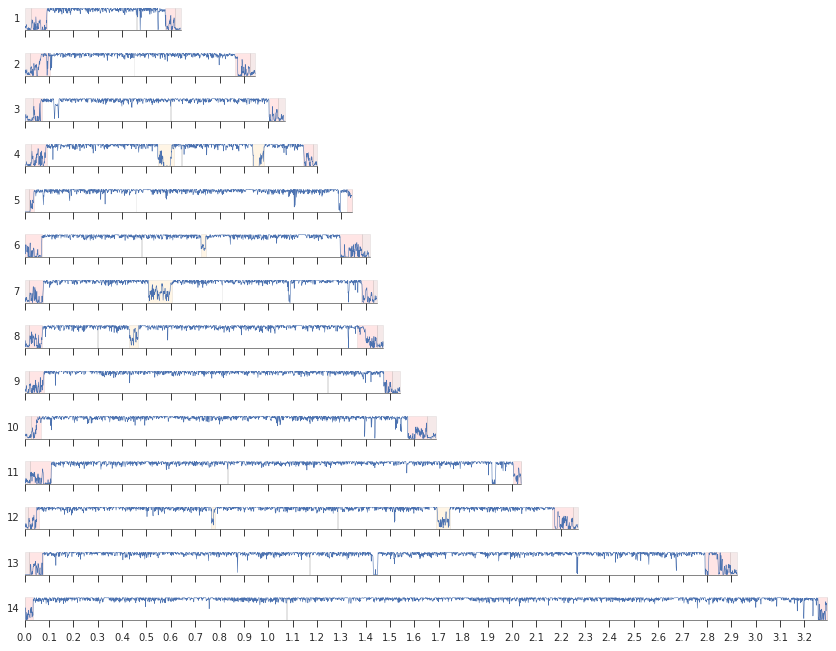

In [46]:
def plot_accessibility(accessibility=accessibility_array, callset='2512_field', bin_size=1000, number_of_samples = 2512):

    fig = plt.figure(figsize=(11.69*1, 8.27*1))
    gs = GridSpec(2*14, 1, height_ratios=([1.0, 1.0])*14)
    gs.update(hspace=0, left=.12, right=.98, top=.98, bottom=.02)

    print('\n', bin_size)
    for i in range(14):
        print(i+1, end=" ")
        chrom = 'Pf3D7_%02d_v3' % (i + 1)
        pos = accessibility[accessibility['chrom']==chrom.encode('ascii')]['pos']
        coverage = accessibility[accessibility['chrom']==chrom.encode('ascii')]['coverage']
        max_pos = np.max(pos)
        if bin_size == 1:
            binned_coverage, bin_centres = coverage, pos
        else:
            binned_coverage, bins, _ = scipy.stats.binned_statistic(pos, coverage, bins=np.arange(1, max_pos, bin_size))
            bin_centres = (bins[:-1]+bins[1:]) / 2
        ax = fig.add_subplot(gs[i*2])
        ax.plot(bin_centres, binned_coverage/number_of_samples)
    #     ax.plot(pos, coverage/number_of_samples)
        ax.set_xlim(0, 3300000)
        ax.set_xticks(range(0, len(core_genome_dict[chrom]), 100000))
        ax.set_xticklabels(np.arange(0, len(core_genome_dict[chrom])/1e+6, 0.1))
        tbl_regions = (etl
            .fromtabix(REGIONS_FN, chrom)
            .pushheader('chrom', 'start', 'end', 'region')
            .convertnumbers()
        )
        for region_chrom, start_pos, end_pos, region_type in tbl_regions.data():
            if region_type != 'Core':
                ax.axvspan(start_pos, end_pos, facecolor=accessibility_colors[region_type], alpha=0.1)
        for s in 'left', 'right', 'top':
            ax.spines[s].set_visible(False)
    #         ax.set_yticklabels([])
        ax.get_xaxis().tick_bottom()
        ax.set_yticks([])

        ax.set_ylabel(i+1, rotation='horizontal', horizontalalignment='right', verticalalignment='center')

        ax.set_xlabel('')
        if i < 13:
            ax.set_xticklabels([])
    #     ax.spines['top'].set_bounds(0, len(core_genome_dict[chrom]))    
        ax.spines['bottom'].set_bounds(0, len(core_genome_dict[chrom]))
    
    fig.savefig(os.path.join(plot_dir, 'short_read_accesibility_%s_%dbp_windows.png' % (callset, bin_size)), dpi=150)
    fig.savefig(os.path.join(plot_dir, 'short_read_accesibility_%s_%dbp_windows.pdf' % (callset, bin_size)))

plot_accessibility()

In [32]:
ox_codes_5 = ['7G8', 'GB4', 'ERS740940', 'ERS740937', 'ERS740936']
callable_loci_merged_fn = '/lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_5_validation_merged.bed'
for i, ox_code in enumerate(ox_codes_5):
    print('%s' % count_symbol(i), end='', flush=True)
    callable_loci_bed_fn = callable_loci_bed_fn_format % ox_code
    !grep CALLABLE {callable_loci_bed_fn} >> {callable_loci_merged_fn}


0/lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_7G8.bed
./lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_GB4.bed
./lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_ERS740940.bed
./lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_ERS740937.bed
./lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_ERS740936.bed


In [33]:
!sort -T /lustre/scratch111/malaria/rp7/temp -k1,1 -k2,2n {callable_loci_merged_fn} > {callable_loci_merged_fn.replace('.bed', '.sort.bed')}

In [34]:
!/nfs/team112_internal/rp7/opt/bedtools/bedtools2/bin/bedtools genomecov \
-i {callable_loci_merged_fn.replace('.bed', '.sort.bed')} \
-g {GENOME_FN+'.fai'} -d \
> /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_5_validation_merged_coverage.txt

In [35]:
!bgzip -f /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_5_validation_merged_coverage.txt
!tabix -f -s 1 -b 2 -e 2 /lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_5_validation_merged_coverage.txt.gz


In [36]:
merged_coverage_fn = "/lustre/scratch109/malaria/rp7/data/pf3k/pilot_5_0/20160525_CallableLoci_bed_release_5/results/callable_loci_5_validation_merged_coverage.txt.gz"

accessibility_array_5_validation = (etl
 .fromtsv(merged_coverage_fn)
 .pushheader(['chrom', 'pos', 'coverage'])
 .convertnumbers()
 .toarray(dtype='a11, i4, i4')
)

In [48]:
print(len(accessibility_array_5_validation))
print(accessibility_array_5_validation[0])
accessibility_array_5_validation

23332839
(b'Pf3D7_01_v3', 1, 0)


array([(b'Pf3D7_01_v3', 1, 0), (b'Pf3D7_01_v3', 2, 0),
       (b'Pf3D7_01_v3', 3, 0), ..., (b'Pf_M76611', 5965, 5),
       (b'Pf_M76611', 5966, 5), (b'Pf_M76611', 5967, 5)], 
      dtype=[('chrom', 'S11'), ('pos', '<i4'), ('coverage', '<i4')])

In [38]:
accessibility_array_fn = "%s/accessibility_array_5_validation.npy" % plot_dir
np.save(accessibility_array_fn, accessibility_array_5_validation)


 1000
1 2 3 4 5 6 7 8 9 10 11 12 13 14 

/nfs/users/nfs_r/rp7/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


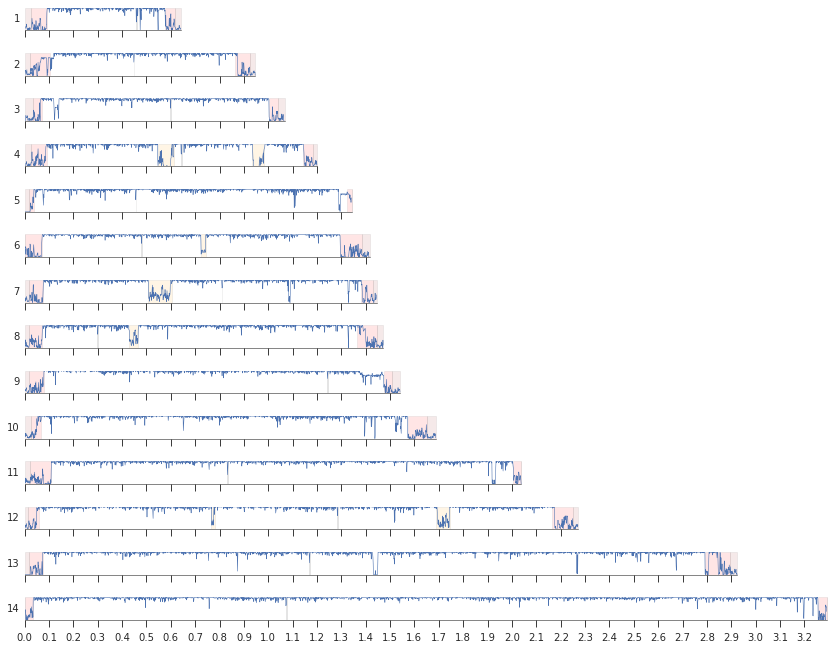

In [47]:
plot_accessibility(accessibility=accessibility_array_5_validation, callset='5_validation')

In [49]:
plot_dir

'/nfs/team112_internal/rp7/data/pf3k/analysis/20160718_pilot_manuscript_accessibility'